# Klasifikasi pada Dataset Pima Indians Diabetes

Klasifikasi dilakukan dengan menggunakan Logistic Regression, Random Forest, K-Nearest Neighbour, Naive Bayes, dan Support Vector Machine. Pemodelan dilakukan dengan membagi dataset ke dalam 80% subset pelatihan dan 20% subset pengujian. Evaluasi model dilakukan dengan menggunakan metrik akurasi, presisi, recall, dan f1-score.

# library yang digunakan

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

# dataset

Dataset yang digunakan berasal dari National Institute of Diabetes and Digestive and Kidney Diseases. Dataset tersebut memuat 768 pengamatan dengan 8 variabel bebas dan 1 variabel terikat. Variabel terikat pada dataset ini memiliki jenis data kategorik dengan 0 merepresentasikan diagnosis negatif dan 1 merepresentasikan diagnosis positif.

In [2]:
#memuat dataset

df = pd.read_csv("/kaggle/input/diabetes.csv")

In [3]:
#menampilkan 5 pengamatan pertama dari dataset

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#menampilkan 5 pengamatan tearkhir dari dataset

df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
#mendeteksi jumlah data duplikat

df.duplicated().sum()

0

In [6]:
#mendeteksi jumlah nilai yang hilang pada dataset

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
#mengetahui tipe data dari masing-masing variabel

df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
#menampilkan statistik deskriptif dari dataset

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# exploratory data analysis

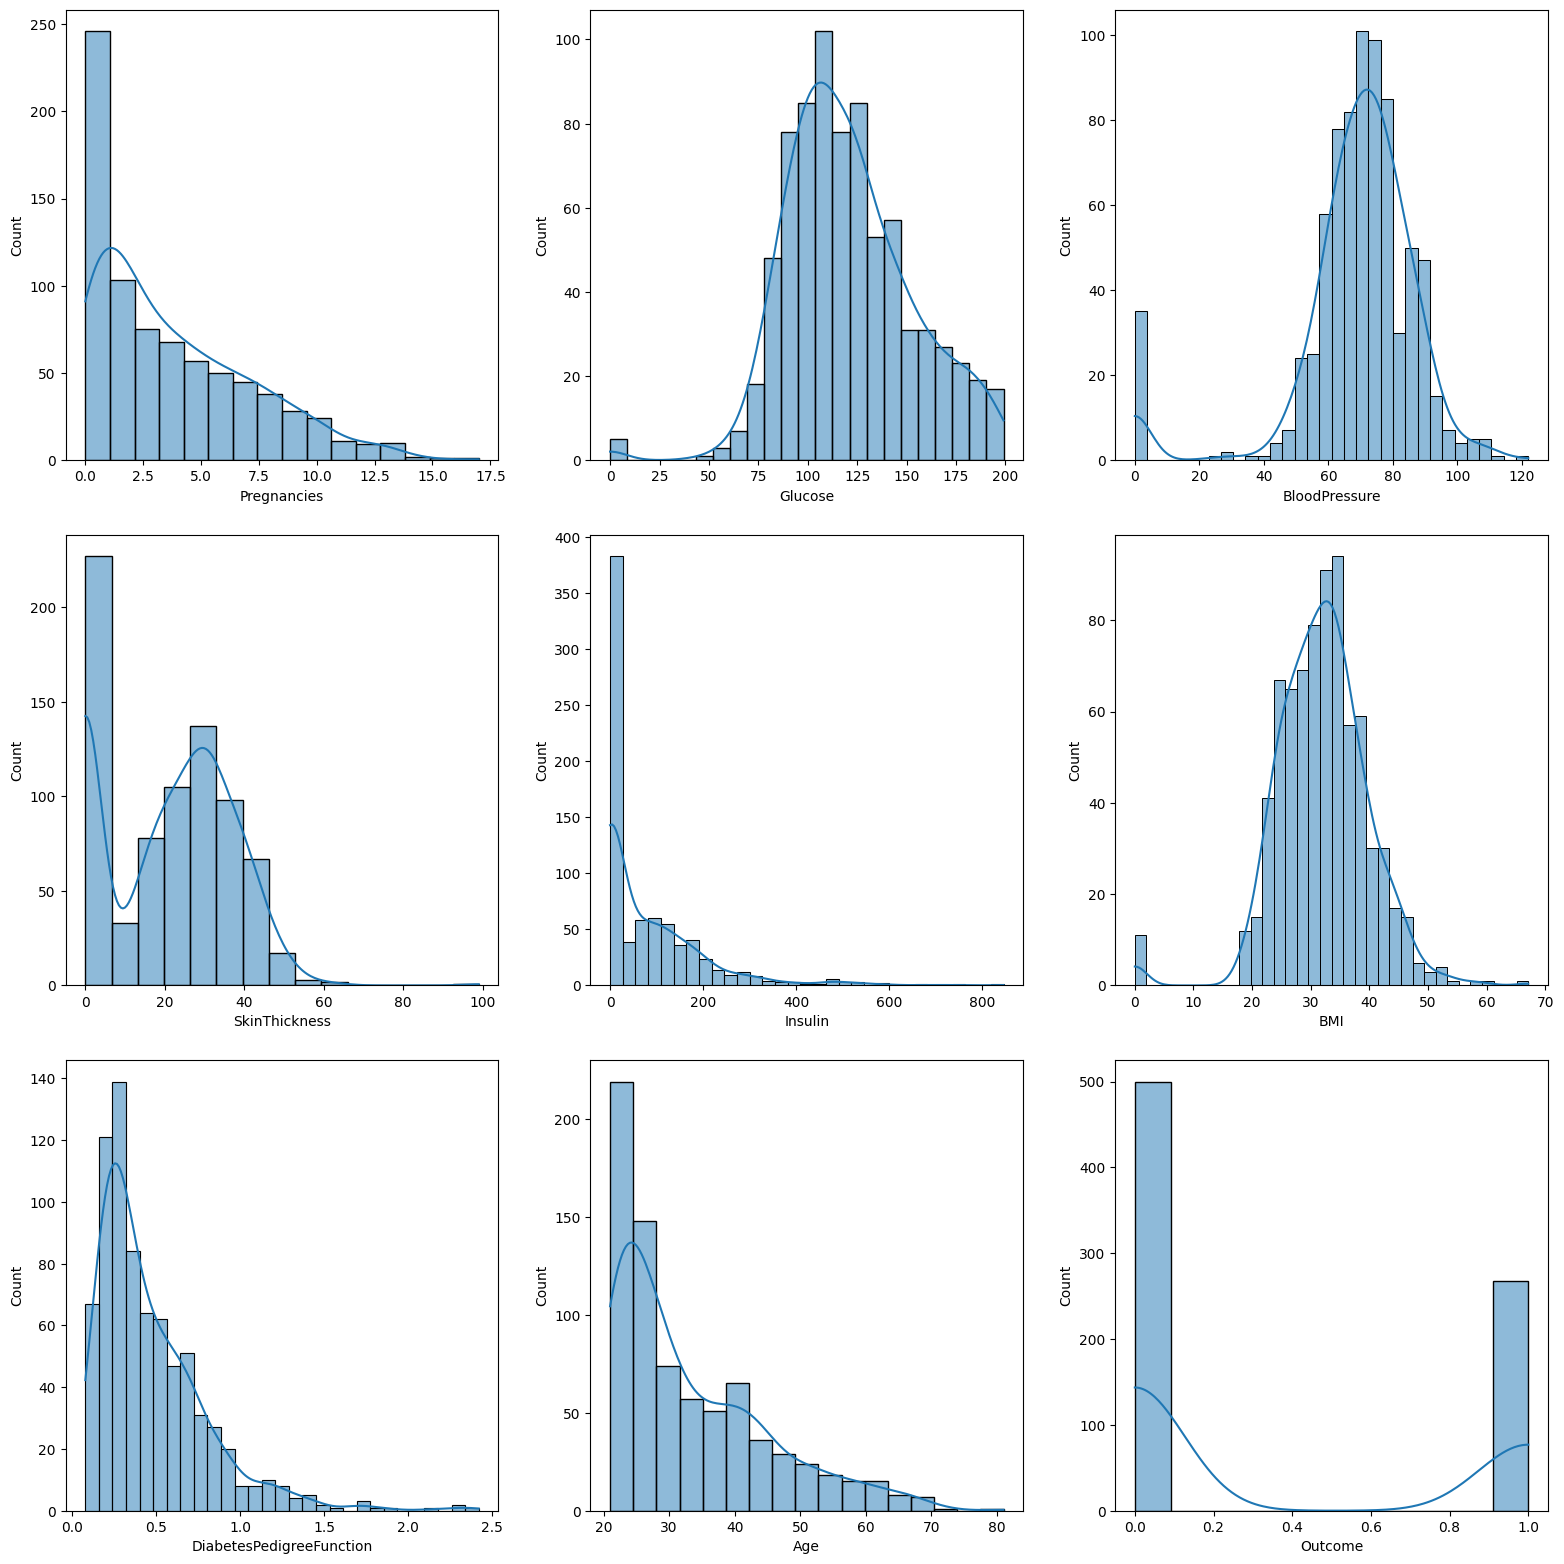

In [9]:
#menampilkan histogram dari dataset

fig = plt.figure(figsize = (16, 16))
for index, col in enumerate(df):
    plt.subplot(3, 3, index +1)
    sns.histplot(df.loc[:, col], kde = True)
fig.tight_layout(pad = 2)

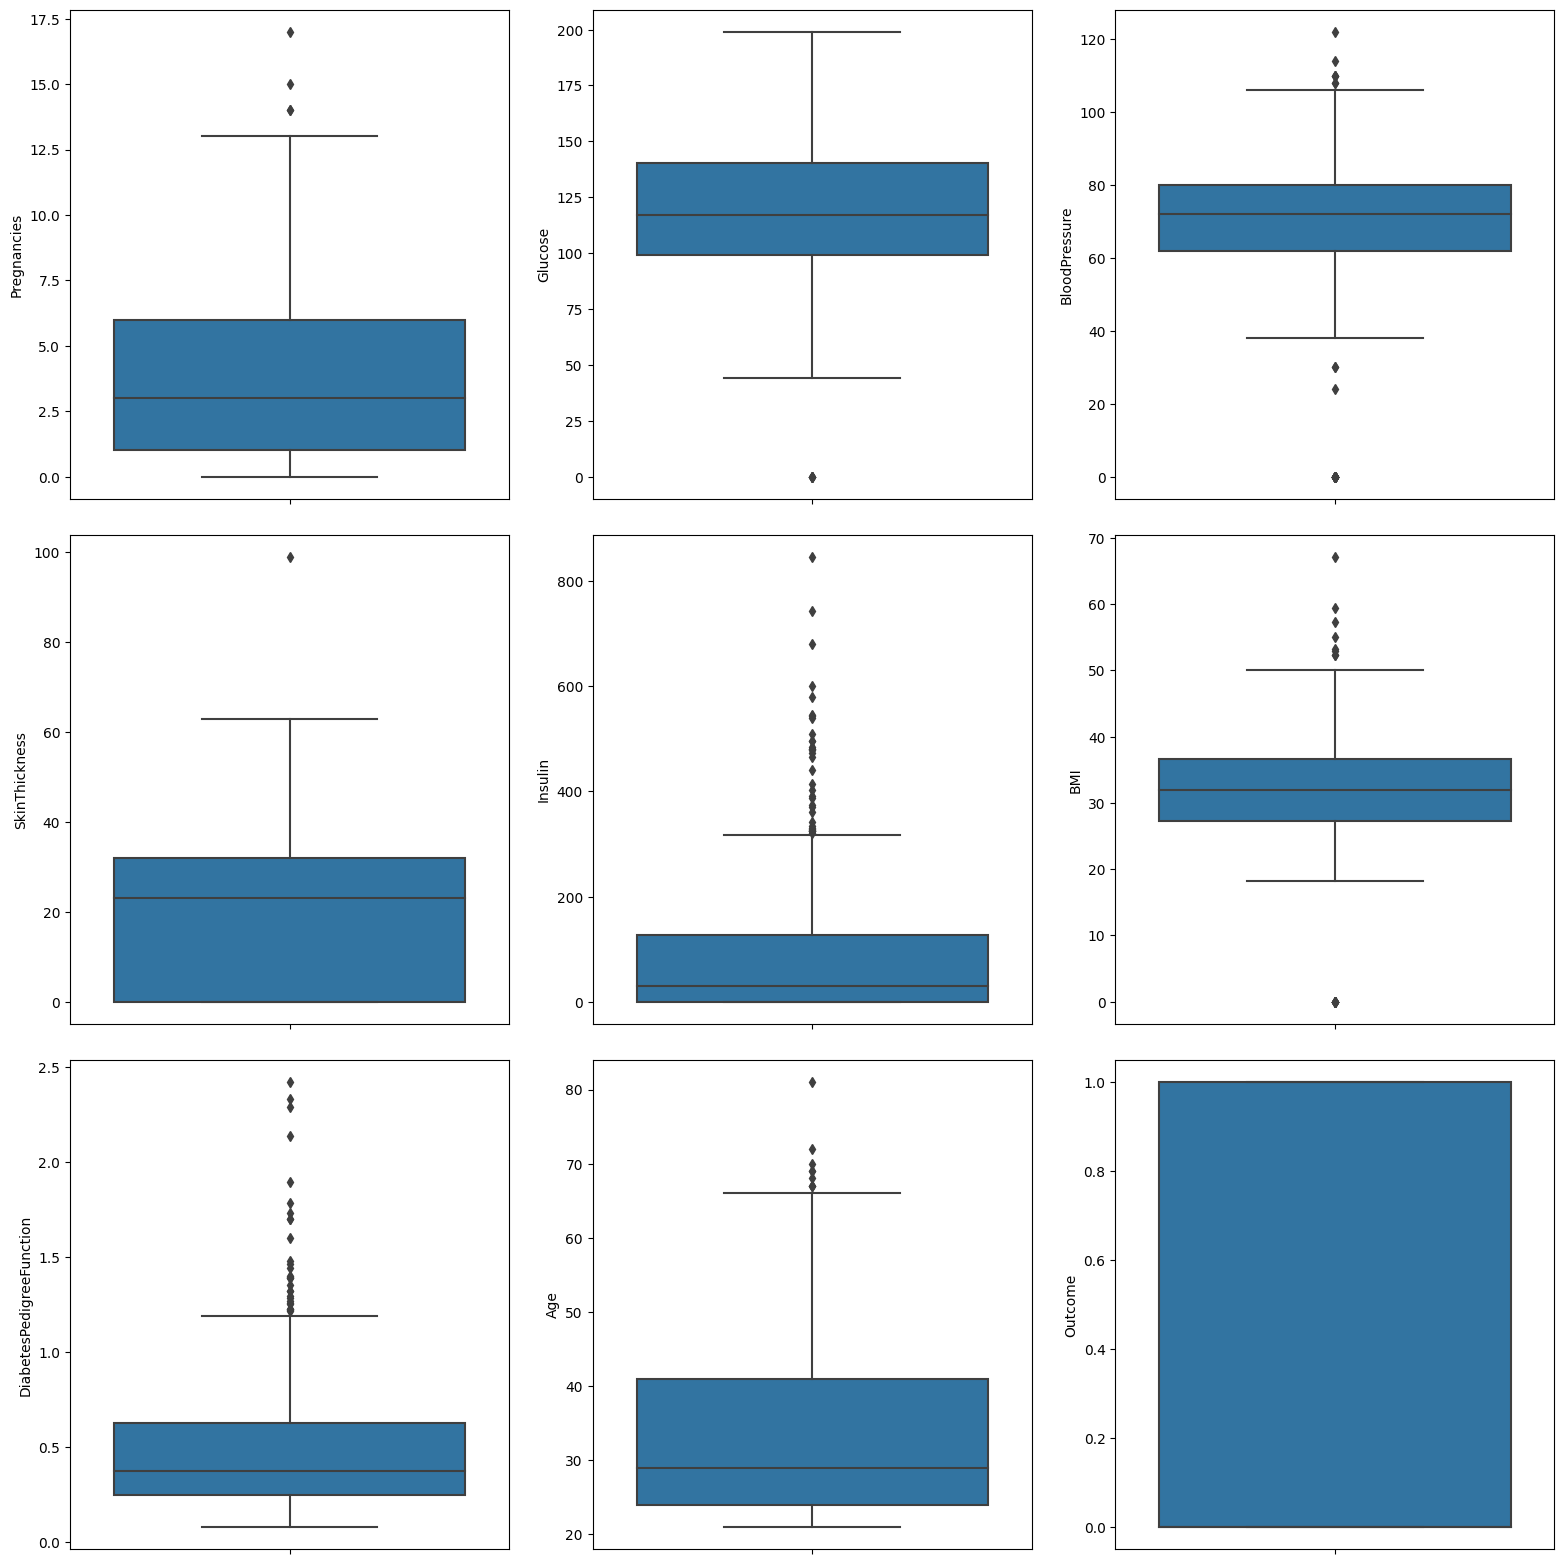

In [10]:
#menampilkan boxplot dari dataset

fig = plt.figure(figsize = (16, 16))
for index, col in enumerate(df):
    plt.subplot(3, 3, index +1)
    sns.boxplot(y = col, data = df)
fig.tight_layout(pad = 2)

# data splitting

In [11]:
#memisahkan data ke dalam variabel bebas (X) dan variabel terikat (y)

X = df.drop(['Outcome'], axis = 1)
y = df['Outcome']

In [12]:
#memisahkan data ke dalam subset pelatihan dan pengujian dengan perbandingan 80:20

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# normalisasi data

In [13]:
#normalisasi dataset menggunakan normalisasi standar

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# pemodelan

In [14]:
#Logistic Regression

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [15]:
#Random Forest

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [16]:
#K-Nearest Neighbour

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
#Naive Bayes

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [18]:
#Support Vector Machine

svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

# prediksi

In [19]:
#Logistic Regression

lr_pred = lr_model.predict(X_test)
lr_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [20]:
#Random Forest

rf_pred = rf_model.predict(X_test)
rf_pred

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0])

In [21]:
#K-Nearest Neighbour

knn_pred = knn_model.predict(X_test)
knn_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [22]:
#Naive Bayes

nb_pred = nb_model.predict(X_test)
nb_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0])

In [23]:
#Support Vector Machine

svm_pred = svm_model.predict(X_test)
svm_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0])

# confusion matrix

Text(0.5, 1.0, 'Linear Regression Confusion Matrix')

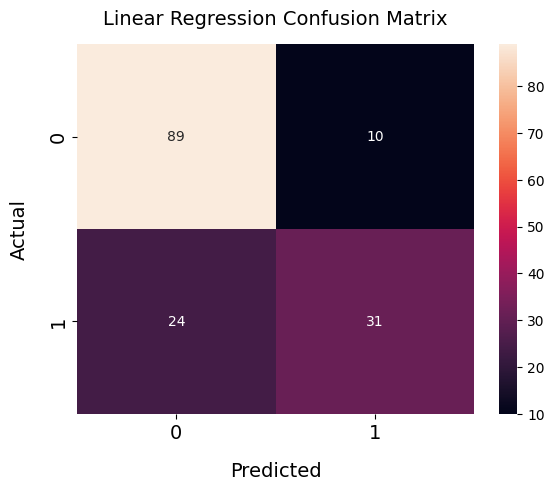

In [24]:
#Logistic Regression

lr_cm = confusion_matrix(y_test, lr_pred)
lr_hm = sns.heatmap(lr_cm, annot = True)
lr_hm.set_xlabel("Predicted", fontsize = 14, labelpad = 14)
lr_hm.xaxis.set_ticklabels(['0', '1'], fontsize = 14)
lr_hm.set_ylabel("Actual", fontsize = 14, labelpad = 14)
lr_hm.yaxis.set_ticklabels(['0', '1'], fontsize = 14)
lr_hm.set_title("Linear Regression Confusion Matrix", fontsize = 14, pad = 14)

Text(0.5, 1.0, 'Random Forest Confusion Matrix')

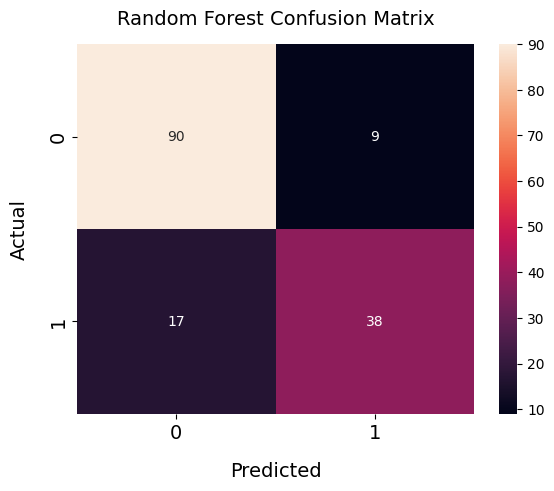

In [25]:
#Random Forest

rf_cm = confusion_matrix(y_test, rf_pred)
rf_hm = sns.heatmap(rf_cm, annot = True)
rf_hm.set_xlabel("Predicted", fontsize = 14, labelpad = 14)
rf_hm.xaxis.set_ticklabels(['0', '1'], fontsize = 14)
rf_hm.set_ylabel("Actual", fontsize = 14, labelpad = 14)
rf_hm.yaxis.set_ticklabels(['0', '1'], fontsize = 14)
rf_hm.set_title("Random Forest Confusion Matrix", fontsize = 14, pad = 14)

Text(0.5, 1.0, 'K-Nearest Neighbour Confusion Matrix')

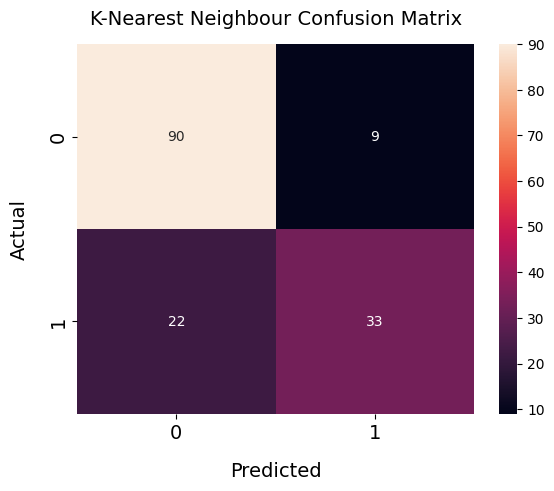

In [26]:
#K-Nearest Neighbour

knn_cm = confusion_matrix(y_test, knn_pred)
knn_hm = sns.heatmap(knn_cm, annot = True)
knn_hm.set_xlabel("Predicted", fontsize = 14, labelpad = 14)
knn_hm.xaxis.set_ticklabels(['0', '1'], fontsize = 14)
knn_hm.set_ylabel("Actual", fontsize = 14, labelpad = 14)
knn_hm.yaxis.set_ticklabels(['0', '1'], fontsize = 14)
knn_hm.set_title("K-Nearest Neighbour Confusion Matrix", fontsize = 14, pad = 14)

Text(0.5, 1.0, 'Naive Bayes Confusion Matrix')

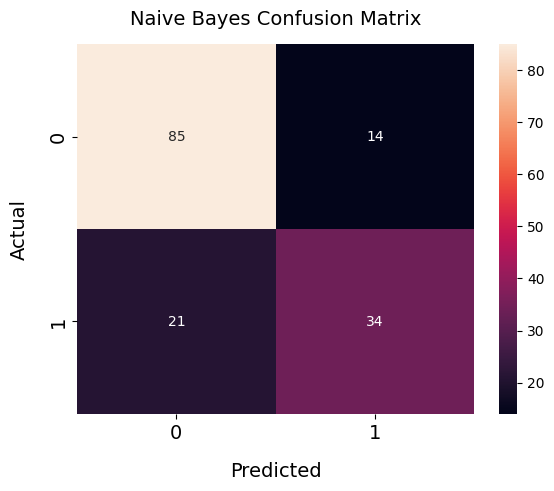

In [27]:
#Naive Bayes

nb_cm = confusion_matrix(y_test, nb_pred)
nb_hm = sns.heatmap(nb_cm, annot = True)
nb_hm.set_xlabel("Predicted", fontsize = 14, labelpad = 14)
nb_hm.xaxis.set_ticklabels(['0', '1'], fontsize = 14)
nb_hm.set_ylabel("Actual", fontsize = 14, labelpad = 14)
nb_hm.yaxis.set_ticklabels(['0', '1'], fontsize = 14)
nb_hm.set_title("Naive Bayes Confusion Matrix", fontsize = 14, pad = 14)

Text(0.5, 1.0, 'Support Vector Machine Confusion Matrix')

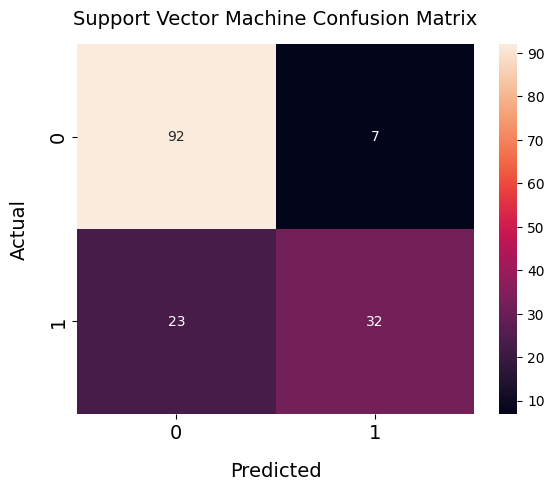

In [28]:
#Support Vector Machine

svm_cm = confusion_matrix(y_test, svm_pred)
svm_hm = sns.heatmap(svm_cm, annot = True)
svm_hm.set_xlabel("Predicted", fontsize = 14, labelpad = 14)
svm_hm.xaxis.set_ticklabels(['0', '1'], fontsize = 14)
svm_hm.set_ylabel("Actual", fontsize = 14, labelpad = 14)
svm_hm.yaxis.set_ticklabels(['0', '1'], fontsize = 14)
svm_hm.set_title("Support Vector Machine Confusion Matrix", fontsize = 14, pad = 14)

# classification reports

In [29]:
#Logistic Regression

print(classification_report(y_test, lr_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



> * interpretasi

1. precision

precision untuk kelas 0 adalah sebesar 0.79, artinya model dapat memprediksi 79% data pada kelas 0 dengan benar

precision untuk kelas 1 adalah sebesar 0.76, artinya model dapat memprediksi 76% data pada kelas 1 dengan benar

rata-rata precision adalah sebesar 0.77, artinya model dapat memprediksi rata-rata 77% data dengan benar

1. recall

recall untuk kelas 0 adalah sebesar 0.90, artinya model dapat menghasilkan 90% prediksi yang tepat pada kelas 0

recall untuk kelas 1 adalah sebesar 0.56, artinya model dapat menghasilkan 56% prediksi yang tepat pada kelas 1

rata-rata recall adalah sebesar 0.73, artinya model dapat menghasilkan rata-rata 73% prediksi yang tepat

1. f1-score

f1-score untuk kelas 0 adalah sebesar 0.84, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas 0 adalah sebesar 84%

f1-score untuk kelas 1 adalah sebesar 0.65, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas 1 adalah sebesar 65%

rata-rata f1-score adalah sebesar 0.74, artinya rata-rata kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat adalah sebesar 74%

1. accuracy

model memiliki akurasi sebesar 0.78, artinya kemampuan model untuk dapat menghasilkan prediksi dengan benar dan tepat dari keseluhuran data yang ada adalah sebesar 78%

In [30]:
#Random Forest

print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87        99
           1       0.81      0.69      0.75        55

    accuracy                           0.83       154
   macro avg       0.82      0.80      0.81       154
weighted avg       0.83      0.83      0.83       154



> * interpretasi

1. precision

precision untuk kelas 0 adalah sebesar 0.84, artinya model dapat memprediksi 84% data pada kelas 0 dengan benar

precision untuk kelas 1 adalah sebesar 0.81, artinya model dapat memprediksi 81% data pada kelas 1 dengan benar

rata-rata precision adalah sebesar 0.82, artinya model dapat memprediksi rata-rata 82% data dengan benar

1. recall

recall untuk kelas 0 adalah sebesar 0.91, artinya model dapat menghasilkan 91% prediksi yang tepat pada kelas 0

recall untuk kelas 1 adalah sebesar 0.69, artinya model dapat menghasilkan 69% prediksi yang tepat pada kelas 1

rata-rata recall adalah sebesar 0.80, artinya model dapat menghasilkan rata-rata 80% prediksi yang tepat

1. f1-score

f1-score untuk kelas 0 adalah sebesar 0.87, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas 0 adalah sebesar 87%

f1-score untuk kelas 1 adalah sebesar 0.75, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas 1 adalah sebesar 75%

rata-rata f1-score adalah sebesar 0.81, artinya rata-rata kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat adalah sebesar 81%

1. accuracy

model memiliki akurasi sebesar 0.83, artinya kemampuan model untuk dapat menghasilkan prediksi dengan benar dan tepat dari keseluhuran data yang ada adalah sebesar 83%

In [31]:
#K-Nearest Neighbour

print(classification_report(y_test, knn_pred))

              precision    recall  f1-score   support

           0       0.80      0.91      0.85        99
           1       0.79      0.60      0.68        55

    accuracy                           0.80       154
   macro avg       0.79      0.75      0.77       154
weighted avg       0.80      0.80      0.79       154



> * interpretasi

1. precision

precision untuk kelas 0 adalah sebesar 0.80, artinya model dapat memprediksi 80% data pada kelas 0 dengan benar

precision untuk kelas 1 adalah sebesar 0.79, artinya model dapat memprediksi 79% data pada kelas 1 dengan benar

rata-rata precision adalah sebesar 0.79, artinya model dapat memprediksi rata-rata 79% data dengan benar

1. recall

recall untuk kelas 0 adalah sebesar 0.91, artinya model dapat menghasilkan 91% prediksi yang tepat pada kelas 0

recall untuk kelas 1 adalah sebesar 0.60, artinya model dapat menghasilkan 60% prediksi yang tepat pada kelas 1

rata-rata recall adalah sebesar 0.75, artinya model dapat menghasilkan rata-rata 75% prediksi yang tepat

1. f1-score

f1-score untuk kelas 0 adalah sebesar 0.85, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas 0 adalah sebesar 85%

f1-score untuk kelas 1 adalah sebesar 0.68, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas 1 adalah sebesar 68%

rata-rata f1-score adalah sebesar 0.77, artinya rata-rata kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat adalah sebesar 77%

1. accuracy

model memiliki akurasi sebesar 0.80, artinya kemampuan model untuk dapat menghasilkan prediksi dengan benar dan tepat dari keseluhuran data yang ada adalah sebesar 80%

In [32]:
#Naive Bayes

print(classification_report(y_test, nb_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



> * interpretasi

1. precision

precision untuk kelas 0 adalah sebesar 0.80, artinya model dapat memprediksi 80% data pada kelas 0 dengan benar

precision untuk kelas 1 adalah sebesar 0.71, artinya model dapat memprediksi 71% data pada kelas 1 dengan benar

rata-rata precision adalah sebesar 0.76, artinya model dapat memprediksi rata-rata 76% data dengan benar

1. recall

recall untuk kelas 0 adalah sebesar 0.86, artinya model dapat menghasilkan 86% prediksi yang tepat pada kelas 0

recall untuk kelas 1 adalah sebesar 0.62, artinya model dapat menghasilkan 62% prediksi yang tepat pada kelas 1

rata-rata recall adalah sebesar 0.74, artinya model dapat menghasilkan rata-rata 74% prediksi yang tepat

1. f1-score

f1-score untuk kelas 0 adalah sebesar 0.83, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas 0 adalah sebesar 83%

f1-score untuk kelas 1 adalah sebesar 0.66, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas 1 adalah sebesar 66%

rata-rata f1-score adalah sebesar 0.74, artinya rata-rata kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat adalah sebesar 74%

1. accuracy

model memiliki akurasi sebesar 0.77, artinya kemampuan model untuk dapat menghasilkan prediksi dengan benar dan tepat dari keseluhuran data yang ada adalah sebesar 77%

In [33]:
#Support Vector Machine

print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86        99
           1       0.82      0.58      0.68        55

    accuracy                           0.81       154
   macro avg       0.81      0.76      0.77       154
weighted avg       0.81      0.81      0.80       154



> * interpretasi

1. precision

precision untuk kelas 0 adalah sebesar 0.80, artinya model dapat memprediksi 80% data pada kelas 0 dengan benar

precision untuk kelas 1 adalah sebesar 0.82, artinya model dapat memprediksi 82% data pada kelas 1 dengan benar

rata-rata precision adalah sebesar 0.81, artinya model dapat memprediksi rata-rata 81% data dengan benar

1. recall

recall untuk kelas 0 adalah sebesar 0.93, artinya model dapat menghasilkan 93% prediksi yang tepat pada kelas 0

recall untuk kelas 1 adalah sebesar 0.58, artinya model dapat menghasilkan 58% prediksi yang tepat pada kelas 1

rata-rata recall adalah sebesar 0.76, artinya model dapat menghasilkan rata-rata 76% prediksi yang tepat

1. f1-score

f1-score untuk kelas 0 adalah sebesar 0.86, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas 0 adalah sebesar 86%

f1-score untuk kelas 1 adalah sebesar 0.68, artinya kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat pada kelas 1 adalah sebesar 68%

rata-rata f1-score adalah sebesar 0.77, artinya rata-rata kemampuan model untuk dapat memprediksi data dengan benar dan menghasilkan prediksi yang tepat adalah sebesar 77%

1. accuracy

model memiliki akurasi sebesar 0.81, artinya kemampuan model untuk dapat menghasilkan prediksi dengan benar dan tepat dari keseluhuran data yang ada adalah sebesar 81%